In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style="darkgrid")

import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'small',
          'figure.figsize': (14, 14),
          'axes.labelsize': 'small',
          'axes.titlesize':'small',
          'xtick.labelsize':'xx-small',
          'ytick.labelsize':'xx-small'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600 #(long description)
pd.set_option('display.max_columns', 500)


np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']
#np.set_printoptions(precision=3)


pd.set_option('display.max_rows', 500)

pd.set_option('display.width', 1000)
    


In [2]:
df=pd.read_csv('US_veris.csv')

In [3]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,1001 to 10000,2017,confidentiality,alter behavior,high,yes,social,phishing,email,law enforcement,server,mail,0,months,NaN,NaN,NaN,nonstate
1,PA,healthcare,NaN,2018,confidentiality,data loss,low,yes,misuse,knowledge abuse,physical access,NaN,server,database,0,days,NaN,0,minutes,nonstate
2,NE,finance and insurance,50001 to 100000,2017,confidentiality,data loss,medium,yes,physical,skimmer,victim public area,customer,terminal,atm,0,NaN,NaN,NaN,NaN,nonstate
3,OH,government,101 to 1000,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0,NaN,NaN,NaN,NaN,nonstate
4,NaN,retail trade,1 to 10,2017,integrity,hardware tampering,high,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0,minutes,NaN,NaN,minutes,nonstate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  1604 non-null   object
 1   industry               1806 non-null   object
 2   n_employees            1372 non-null   object
 3   incident_year          1806 non-null   int64 
 4   attribute              1806 non-null   object
 5   compromise             1797 non-null   object
 6   confidence             745 non-null    object
 7   data_disclosure        1766 non-null   object
 8   action                 1800 non-null   object
 9   action_variety         1543 non-null   object
 10  action_vector          1448 non-null   object
 11  discovery_variety      1020 non-null   object
 12  asset_group            1806 non-null   object
 13  asset_variety          1806 non-null   object
 14  availability_duration  1655 non-null   object
 15  discovery            

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
state,202,11.2


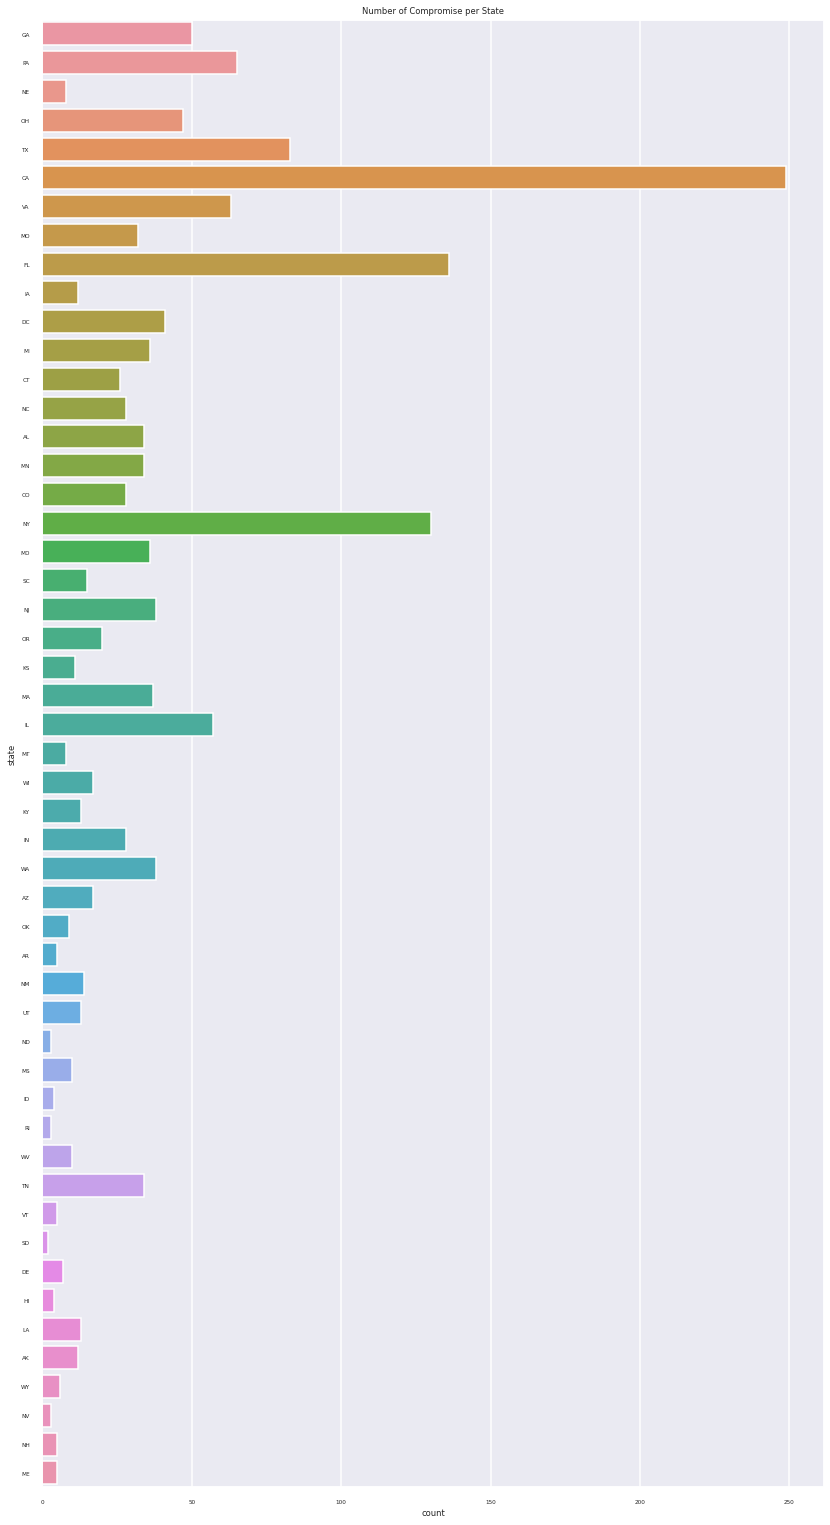

In [7]:
plt.figure(figsize=(14,27))
sns.countplot(y=df.state)
plt.title('Number of Compromise per State')
plt.show()

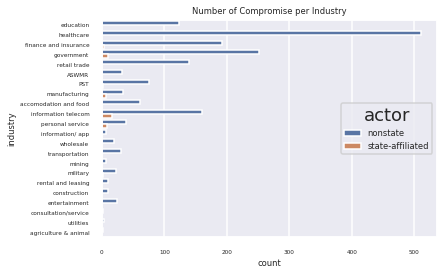

In [8]:
sns.countplot(y='industry', hue='actor', data=df)
plt.title('Number of Compromise per Industry')
plt.show()

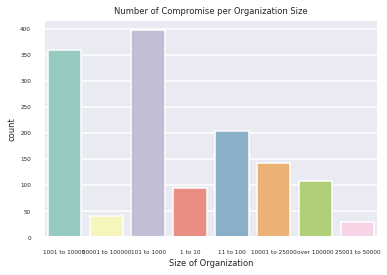

In [9]:
sns.countplot(x=df.n_employees, palette='Set3')
plt.title('Number of Compromise per Organization Size')
plt.xlabel('Size of Organization')
plt.show()

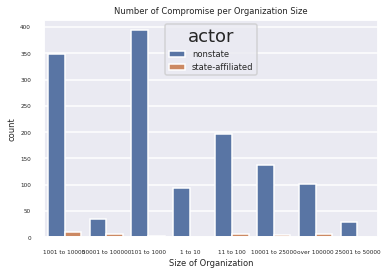

In [10]:
sns.countplot(x='n_employees', hue='actor', data=df)
plt.title('Number of Compromise per Organization Size')
plt.xlabel('Size of Organization')

plt.show()

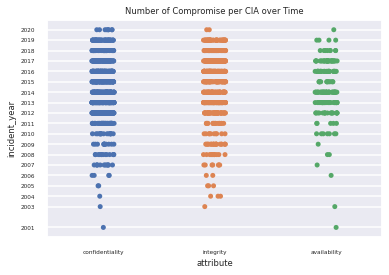

In [11]:
g=sns.stripplot(x='attribute', y='incident_year', data=df)
g.set(yticks=[2001,2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,2014,2015,2016,2017,2018,2019,2020])
plt.title('Number of Compromise per CIA over Time')
plt.show()

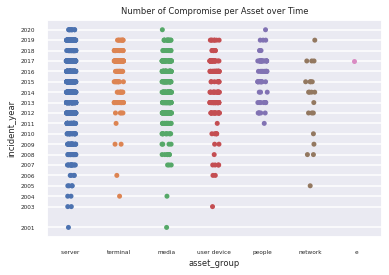

In [12]:
g=sns.stripplot(x='asset_group', y='incident_year', data=df)
g.set(yticks=[2001,2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,2014,2015,2016,2017,2018,2019,2020])
plt.title('Number of Compromise per Asset over Time')
plt.show()

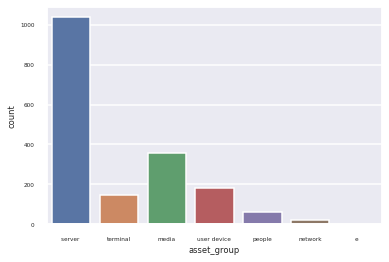

In [13]:
sns.countplot(x=df.asset_group)
plt.show()

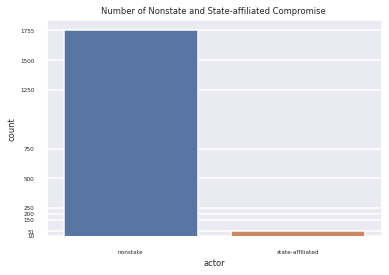

In [14]:

g=sns.countplot(df.actor)

g.set(yticks=[51,10,150,200,250,500,750,1250,1500,1755])
plt.title('Number of Nonstate and State-affiliated Compromise ')

plt.show()

In [15]:
df_state=df[df['actor']=='state-affiliated']
df_non=df[df['actor']=='nonstate']

df_state.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
5,GA,ASWMR,1001 to 10000,2017,confidentiality,loss,high,yes,hacking,exploit vuln,web application,NaN,server,web application,0,NaN,NaN,NaN,NaN,state-affiliated
9,VA,manufacturing,50001 to 100000,2009,integrity,software installation,NaN,yes,malware,c2,web drive-by,law enforcement,server,web application,0,NaN,NaN,NaN,NaN,state-affiliated
91,NaN,government,1001 to 10000,2013,integrity,software installation,high,yes,hacking,use of backdoor or c2,backdoor or c2,suspicious traffic,user device,desktop,0,NaN,NaN,NaN,NaN,state-affiliated
124,NY,personal service,11 to 100,2013,integrity,modify configuration,NaN,yes,social,phishing,email,NaN,server,web application,0,hours,hours,hours,hours,state-affiliated
129,NaN,finance and insurance,NaN,2014,availability,interruption,0,no,hacking,dos,web application,NaN,server,mainframe,NaN,NaN,NaN,NaN,NaN,state-affiliated


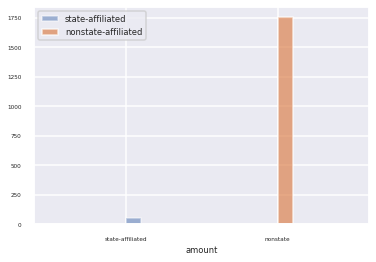

In [16]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_state.actor, alpha=0.5, label='state-affiliated')
plt.hist(df_non.actor, alpha=0.7, label='nonstate-affiliated')
plt.xlabel('amount')
plt.legend()
plt.ylim()
plt.show()

In [17]:
round(len(df_state.actor)/len(df_non.actor),4)

0.0291

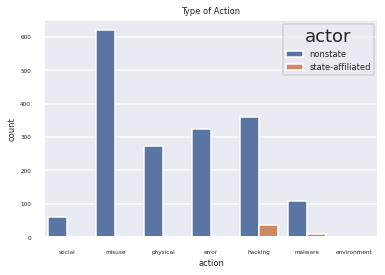

In [18]:
sns.countplot(x='action', hue='actor', data=df)
plt.title('Type of Action')

plt.show()

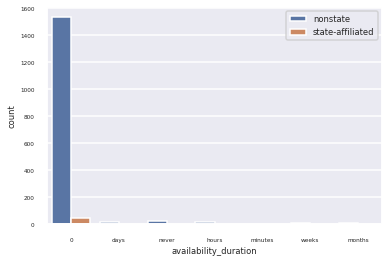

In [19]:
sns.countplot(x='availability_duration', hue='actor', data=df)
plt.legend(loc='upper right')

plt.show()

In [30]:
df_st=df.groupby(by=['state', 'industry'])[['actor']].count().reset_index()
df_st.sort_values('actor', ascending=False).head(10)

,state,industry,actor
72,FL,healthcare,62
30,CA,information telecom,62
29,CA,healthcare,52
262,NY,healthcare,35
28,CA,government,29
338,TX,healthcare,28
260,NY,finance and insurance,27
303,PA,healthcare,25
27,CA,finance and insurance,20
57,DC,government,19


In [21]:
df_st.head()

,actor
state,
AK,12
AL,34
AR,5
AZ,17
CA,249


In [22]:
import plotly.graph_objects as go

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations=df_st['state'], # Spatial coordinates
    z = df_st['actor'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of compromise per state",
))

fig.update_layout(
    title_text = 'Cybersecurity Compromise by State',
    geo_scope='usa', # limite map scope to USA
)

fig.write_html("usmap.html")

fig.show()

## Preparation of the Data

In [32]:
for col in df.columns:
  print(col, df[col].nunique())

state 51
industry 22
n_employees 8
incident_year 19
attribute 3
compromise 19
confidence 4
data_disclosure 2
action 7
action_variety 70
action_vector 41
discovery_variety 22
asset_group 7
asset_variety 53
availability_duration 7
discovery 8
containment 8
exfiltration 8
time_compromise 7
actor 2


In [33]:
for nul in df.columns:
  if df[nul].isnull().sum()/len(df)>0:
    print(nul, df[nul].isnull().mean().round(3))

state 0.112
n_employees 0.24
compromise 0.005
confidence 0.587
data_disclosure 0.022
action 0.003
action_variety 0.146
action_vector 0.198
discovery_variety 0.435
availability_duration 0.084
discovery 0.691
containment 0.858
exfiltration 0.868
time_compromise 0.801


In [34]:
df.availability_duration.replace(to_replace='never', value='0', inplace=True)

In [35]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,1001 to 10000,2017,confidentiality,alter behavior,high,yes,social,phishing,email,law enforcement,server,mail,0,months,NaN,NaN,NaN,nonstate
1,PA,healthcare,NaN,2018,confidentiality,data loss,low,yes,misuse,knowledge abuse,physical access,NaN,server,database,0,days,NaN,0,minutes,nonstate
2,NE,finance and insurance,50001 to 100000,2017,confidentiality,data loss,medium,yes,physical,skimmer,victim public area,customer,terminal,atm,0,NaN,NaN,NaN,NaN,nonstate
3,OH,government,101 to 1000,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0,NaN,NaN,NaN,NaN,nonstate
4,NaN,retail trade,1 to 10,2017,integrity,hardware tampering,high,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0,minutes,NaN,NaN,minutes,nonstate


In [36]:
df.availability_duration.value_counts()

0          1603
days         20
hours        15
weeks         7
months        6
minutes       4
Name: availability_duration, dtype: int64

In [37]:
map1={'1 to 10':1, '11 to 100':2, '101 to 1000':3, '1001 to 10000':4, '25001 to 50000':5, '50001 to 100000':6,
     
      '10001 to 25000':7 ,'over 100000':8}

df['n_employees']=df['n_employees'].map(map1)
df['n_employees'].value_counts()

3.0    397
4.0    359
2.0    203
7.0    142
8.0    107
1.0     94
6.0     41
5.0     29
Name: n_employees, dtype: int64

In [38]:
map2={'0':0, 'low':1, 'medium':2, 'high':3}

df['confidence']=df.confidence.map(map2)


In [39]:
map3={'0':0, 'seconds':1, 'minutes':2, 'hours':3, 'days':4, 'weeks':5, 'months':6, 'years':7}
cols=['availability_duration','discovery','containment','exfiltration','time_compromise' ]

for col in cols:
    df[col]=df[col].map(map3)

In [40]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,NaN,NaN,NaN,nonstate
1,PA,healthcare,NaN,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,NaN,server,database,0.0,4.0,NaN,0.0,2.0,nonstate
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,NaN,NaN,NaN,NaN,nonstate
3,OH,government,3.0,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0.0,NaN,NaN,NaN,NaN,nonstate
4,NaN,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,NaN,NaN,2.0,nonstate


In [41]:
map4={'nonstate':0,'state-affiliated':1}

df['actor']=df.actor.map(map4)

In [42]:
df.actor.value_counts()

0    1755
1      51
Name: actor, dtype: int64

In [43]:
df.discovery.value_counts()

6.0    137
4.0    109
7.0    101
3.0    101
5.0     49
2.0     48
1.0      8
0.0      5
Name: discovery, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1604 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1372 non-null   float64
 3   incident_year          1806 non-null   int64  
 4   attribute              1806 non-null   object 
 5   compromise             1797 non-null   object 
 6   confidence             745 non-null    float64
 7   data_disclosure        1766 non-null   object 
 8   action                 1800 non-null   object 
 9   action_variety         1543 non-null   object 
 10  action_vector          1448 non-null   object 
 11  discovery_variety      1020 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1655 non-null   float64
 15  disc

In [45]:
df.keys()

Index(['state', 'industry', 'n_employees', 'incident_year', 'attribute', 'compromise', 'confidence', 'data_disclosure', 'action', 'action_variety', 'action_vector', 'discovery_variety', 'asset_group', 'asset_variety', 'availability_duration', 'discovery', 'containment', 'exfiltration', 'time_compromise', 'actor'], dtype='object')

In [46]:
df[['state', 'industry', 'incident_year', 'attribute', 'compromise',
    'data_disclosure', 'action', 'action_variety', 'action_vector', 'discovery_variety', 
    'asset_group', 'asset_variety']]=df[['state', 'industry', 'incident_year', 'attribute', 'compromise',
    'data_disclosure', 'action', 'action_variety', 'action_vector', 'discovery_variety', 
    'asset_group', 'asset_variety']].astype('category')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   state                  1604 non-null   category
 1   industry               1806 non-null   category
 2   n_employees            1372 non-null   float64 
 3   incident_year          1806 non-null   category
 4   attribute              1806 non-null   category
 5   compromise             1797 non-null   category
 6   confidence             745 non-null    float64 
 7   data_disclosure        1766 non-null   category
 8   action                 1800 non-null   category
 9   action_variety         1543 non-null   category
 10  action_vector          1448 non-null   category
 11  discovery_variety      1020 non-null   category
 12  asset_group            1806 non-null   category
 13  asset_variety          1806 non-null   category
 14  availability_duration  1655 non-null   f

In [48]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,NaN,NaN,NaN,0
1,PA,healthcare,NaN,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,NaN,server,database,0.0,4.0,NaN,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,NaN,NaN,NaN,NaN,0
3,OH,government,3.0,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0.0,NaN,NaN,NaN,NaN,0
4,NaN,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,NaN,NaN,2.0,0
